In [1]:
import numpy as np # linear algebra        
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.preprocessing import MinMaxScaler # data normalization
from sklearn.neighbors import NearestNeighbors # KNN

In [2]:
df = pd.read_csv('main_dataset.csv') # read the dataset

In [3]:
df.info() # get the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   track_uri             277938 non-null  object 
 1   name                  277922 non-null  object 
 2   artists_names         277938 non-null  object 
 3   popularity            277938 non-null  int64  
 4   album_type            277938 non-null  object 
 5   is_playable           277938 non-null  bool   
 6   release_date          277938 non-null  object 
 7   artists_uris          277938 non-null  object 
 8   playlist_uris         277938 non-null  object 
 9   danceability          277938 non-null  float64
 10  energy                277938 non-null  float64
 11  key                   277938 non-null  float64
 12  loudness              277938 non-null  float64
 13  mode                  277938 non-null  float64
 14  speechiness           277938 non-null  float64
 15  

In [4]:
df.head(5) # show the first 5 rows of the dataset

,track_uri,name,artists_names,popularity,album_type,is_playable,release_date,artists_uris,playlist_uris,danceability,...,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,time_signature,artists_popularities,artists_genres,artists_followers
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0,single,True,2015-11-20,['spotify:artist:4B7SI5PsnEgeMQd6gSIrbn'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.611,...,0.000794,0.7530,0.520,128.050,https://api.spotify.com/v1/audio-analysis/3v6s...,195000.0,4.0,[9],[[]],[765]
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",33,album,True,2015-09-04,"['spotify:artist:6hfwwpXqZPRC9CsKI7qtv1', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.638,...,0.009530,0.3490,0.250,122.985,https://api.spotify.com/v1/audio-analysis/7KCW...,194641.0,4.0,"[68, 56]","[['etherpop', 'pop', 'r&b'], ['chillstep', 'fu...","[1283665, 138396]"
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],52,single,True,2014-10-15,['spotify:artist:7kFfY4UjNdNyaeUgLIEbIF'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.560,...,0.000008,0.2410,0.247,170.044,https://api.spotify.com/v1/audio-analysis/2CY9...,217573.0,4.0,[65],"[['detroit hip hop', 'pop r&b', 'r&b', 'trap',...",[1544981]
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0,single,True,2014-07-10,['spotify:artist:2F8tffsSfw1767WgjtAHBW'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.525,...,0.000088,0.0888,0.199,92.011,https://api.spotify.com/v1/audio-analysis/11BP...,443478.0,4.0,[32],"[['shimmer pop', 'shiver pop']]",[18241]
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0,single,True,2014-06-17,"['spotify:artist:0B8XBGloduGCBtRK8nm2YF', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.367,...,0.000001,0.0965,0.163,115.917,https://api.spotify.com/v1/audio-analysis/3yUJ...,225862.0,4.0,"[30, 39]","[['indie poptimism'], ['la pop']]","[10105, 13775]"


In [5]:
df2 = df[df['artists_names'].apply(lambda x: "YoungBoy Never Broke Again" in x)] # get the rows that contain the artist name "YoungBoy Never Broke Again"

In [6]:
df2.head() # show the first 5 rows of the dataset

,track_uri,name,artists_names,popularity,album_type,is_playable,release_date,artists_uris,playlist_uris,danceability,...,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,time_signature,artists_popularities,artists_genres,artists_followers
3122,spotify:track:2Er9IzqoPszUuqwYHfNzAj,Bestie,"['DaBaby', 'YoungBoy Never Broke Again']",36,album,True,2022-03-04,"['spotify:artist:4r63FhuTkUYltbVAg5TQnk', 'spo...","['spotify:playlist:5jNcfszdUyIL56ghrbBhSP', 's...",0.837,...,0.0,0.3970,0.809,145.915,https://api.spotify.com/v1/audio-analysis/2Er9...,111971.0,4.0,"[82, 85]","[['north carolina hip hop', 'rap', 'trap'], ['...","[10679121, 10791449]"
83767,spotify:track:3GbQcjKWT7eVpUfzqwUjxv,Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,"['Lil Nas X', 'YoungBoy Never Broke Again']",62,single,True,2022-06-24,"['spotify:artist:7jVv8c5Fj3E9VhNjxT4snq', 'spo...","['spotify:playlist:6ofVHBK1fMbdzr96UqZrF0', 's...",0.872,...,0.0,0.1090,0.778,149.956,https://api.spotify.com/v1/audio-analysis/3GbQ...,180666.0,4.0,"[81, 85]","[['lgbtq+ hip hop', 'pop'], ['baton rouge rap'...","[12368648, 10791449]"
85250,spotify:track:57IRaiAB4hBZu3gnNVZC0v,No Smoke,['YoungBoy Never Broke Again'],61,album,True,2017-08-04,['spotify:artist:7wlFDEWiM5OoIAt8RSli8b'],['spotify:playlist:3CgO5JGeOx7MdebtDzVSpi'],0.658,...,0.0,0.0978,0.804,143.966,https://api.spotify.com/v1/audio-analysis/57IR...,160000.0,4.0,[85],"[['baton rouge rap', 'trap']]",[10791449]
85251,spotify:track:4O1uCappFiU3bisYUdUBWy,I Am Who They Say I Am (feat. Kevin Gates and ...,['YoungBoy Never Broke Again'],59,album,True,2018-09-14,['spotify:artist:7wlFDEWiM5OoIAt8RSli8b'],['spotify:playlist:3CgO5JGeOx7MdebtDzVSpi'],0.722,...,0.0,0.3240,0.790,92.024,https://api.spotify.com/v1/audio-analysis/4O1u...,200170.0,4.0,[85],"[['baton rouge rap', 'trap']]",[10791449]
85252,spotify:track:1i3Ngjz77ce8CfhIjr1B7C,Chopper City,['YoungBoy Never Broke Again'],50,album,True,2020-11-13,['spotify:artist:7wlFDEWiM5OoIAt8RSli8b'],"['spotify:playlist:3CgO5JGeOx7MdebtDzVSpi', 's...",0.598,...,0.0,0.1330,0.707,80.777,https://api.spotify.com/v1/audio-analysis/1i3N...,152607.0,4.0,[85],"[['baton rouge rap', 'trap']]",[10791449]


In [7]:
df.columns # get the columns of the dataset

Index(['track_uri', 'name', 'artists_names', 'popularity', 'album_type',
       'is_playable', 'release_date', 'artists_uris', 'playlist_uris',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'analysis_url', 'duration_ms', 'time_signature', 'artists_popularities',
       'artists_genres', 'artists_followers'],
      dtype='object')

In [8]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000
mean,27.796631,0.552583,0.556866,5.236873,-10.363654,0.637383,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,2.324961e+05,3.877793
std,20.866179,0.188905,0.279681,3.556635,6.672049,0.480756,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,1.171830e+05,0.469444
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706000e+03,0.000000
25%,8.000000,0.431000,0.342000,2.000000,-12.747000,0.000000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.720130e+05,4.000000
50%,28.000000,0.571000,0.591000,5.000000,-8.397000,1.000000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.131055e+05,4.000000
75%,44.000000,0.693000,0.792000,8.000000,-5.842000,1.000000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,2.648660e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,4.882000,1.000000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,3.919895e+06,5.000000


In [9]:
df['time_signature'].value_counts() # get the value counts of the column "time_signature"

time_signature
4.0    239497
3.0     29582
5.0      5572
1.0      3192
0.0        95
Name: count, dtype: int64

In [10]:
df = df.drop(['artists_followers', 'popularity', 'artists_genres', 'analysis_url', 'playlist_uris', 'artists_uris', 'release_date', 'is_playable', 'album_type'  ], axis = 1) # drop the columns that are not needed

In [11]:
df.loc[df['name'] == 'Best'] # get the rows that contain the song name "Best"

,track_uri,name,artists_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists_popularities
159516,spotify:track:0jshmziHdeIOM3bF6zq0sA,Best,['Alkaline'],0.481,0.792,5.0,-7.440,0.0,0.0717,0.593,0.000027,0.106,0.758,99.984,153600.0,4.0,[57]
211312,spotify:track:5SJXktlo399QlOYBu4rB3m,Best,['Gracie Abrams'],0.597,0.368,10.0,-10.575,1.0,0.0369,0.836,0.000090,0.110,0.436,121.918,233499.0,4.0,[76]


In [12]:
df.head() # show the first 5 rows of the dataset

,track_uri,name,artists_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists_popularities
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0.611,0.614,5.0,-8.815,0.0,0.0672,0.0169,0.000794,0.7530,0.520,128.050,195000.0,4.0,[9]
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",0.638,0.781,4.0,-6.848,0.0,0.0285,0.0118,0.009530,0.3490,0.250,122.985,194641.0,4.0,"[68, 56]"
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],0.560,0.810,0.0,-8.029,0.0,0.0872,0.0071,0.000008,0.2410,0.247,170.044,217573.0,4.0,[65]
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0.525,0.699,9.0,-4.571,1.0,0.0353,0.0178,0.000088,0.0888,0.199,92.011,443478.0,4.0,[32]
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0.367,0.771,9.0,-5.863,1.0,0.1060,0.3650,0.000001,0.0965,0.163,115.917,225862.0,4.0,"[30, 39]"


In [13]:
df.info() # get the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   track_uri             277938 non-null  object 
 1   name                  277922 non-null  object 
 2   artists_names         277938 non-null  object 
 3   danceability          277938 non-null  float64
 4   energy                277938 non-null  float64
 5   key                   277938 non-null  float64
 6   loudness              277938 non-null  float64
 7   mode                  277938 non-null  float64
 8   speechiness           277938 non-null  float64
 9   acousticness          277938 non-null  float64
 10  instrumentalness      277938 non-null  float64
 11  liveness              277938 non-null  float64
 12  valence               277938 non-null  float64
 13  tempo                 277938 non-null  float64
 14  duration_ms           277938 non-null  float64
 15  

In [14]:
df['intensity'] = (df['loudness'] * df['energy']) # create a new column called "intensity" that is the product of the columns "loudness" and "energy"
df.drop(['loudness', 'energy'], axis = 1) # drop the columns "loudness" and "energy"

,track_uri,name,artists_names,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists_popularities,intensity
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0.611,5.0,0.0,0.0672,0.01690,0.000794,0.7530,0.520,128.050,195000.0,4.0,[9],-5.412410
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",0.638,4.0,0.0,0.0285,0.01180,0.009530,0.3490,0.250,122.985,194641.0,4.0,"[68, 56]",-5.348288
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],0.560,0.0,0.0,0.0872,0.00710,0.000008,0.2410,0.247,170.044,217573.0,4.0,[65],-6.503490
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0.525,9.0,1.0,0.0353,0.01780,0.000088,0.0888,0.199,92.011,443478.0,4.0,[32],-3.195129
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0.367,9.0,1.0,0.1060,0.36500,0.000001,0.0965,0.163,115.917,225862.0,4.0,"[30, 39]",-4.520373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,spotify:track:6wLr2oR8eqUG5Beleh2Crm,You Can Call Me Al,['Paul Simon'],0.777,5.0,1.0,0.0470,0.12600,0.010800,0.0917,0.851,128.349,276360.0,4.0,[70],-6.533700
277934,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y,99 Red Balloons,['Nena'],0.543,4.0,1.0,0.1940,0.08530,0.000092,0.1110,0.415,193.513,284773.0,4.0,[63],-6.164298
277935,spotify:track:7FwBtcecmlpc1sLySPXeGE,Dancing In the Dark,['Bruce Springsteen'],0.527,1.0,0.0,0.0366,0.01150,0.000000,0.1880,0.495,148.723,241307.0,4.0,[76],-5.312880
277936,spotify:track:2olVm1lHicpveMAo4AUDRB,The Power Of Love,['Huey Lewis & The News'],0.768,5.0,1.0,0.0313,0.09640,0.000029,0.0970,0.962,118.773,234333.0,4.0,[65],-4.235361


In [15]:
df.describe() # get the descriptive statistics of the dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,intensity
count,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000,277938.000000
mean,0.552583,0.556866,5.236873,-10.363654,0.637383,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,2.324961e+05,3.877793,-4.273402
std,0.188905,0.279681,3.556635,6.672049,0.480756,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,1.171830e+05,0.469444,2.109699
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706000e+03,0.000000,-42.077384
25%,0.431000,0.342000,2.000000,-12.747000,0.000000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.720130e+05,4.000000,-5.289195
50%,0.571000,0.591000,5.000000,-8.397000,1.000000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.131055e+05,4.000000,-4.137674
75%,0.693000,0.792000,8.000000,-5.842000,1.000000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,2.648660e+05,4.000000,-3.081171
max,0.989000,1.000000,11.000000,4.882000,1.000000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,3.919895e+06,5.000000,4.862472


In [16]:
potential_x_features = ['danceability', 'key', 'intensity', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',] # create a list of potential x features

In [17]:
dfx = df[potential_x_features] # create a new dataframe that contains the potential x features

In [18]:
dfx = dfx.drop(['mode', 'key', 'duration_ms'], axis = 1) # drop the columns "mode", "key", and "duration_ms"

In [19]:
dfx.columns # get the columns of the dataframe

Index(['danceability', 'intensity', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [20]:
sns.set(font_scale = 1) # set the font scale
plt.rcParams["axes.grid"] = False # remove the grid lines
%matplotlib inline # show the plots in the notebook

UsageError: unrecognized arguments: # show the plots in the notebook


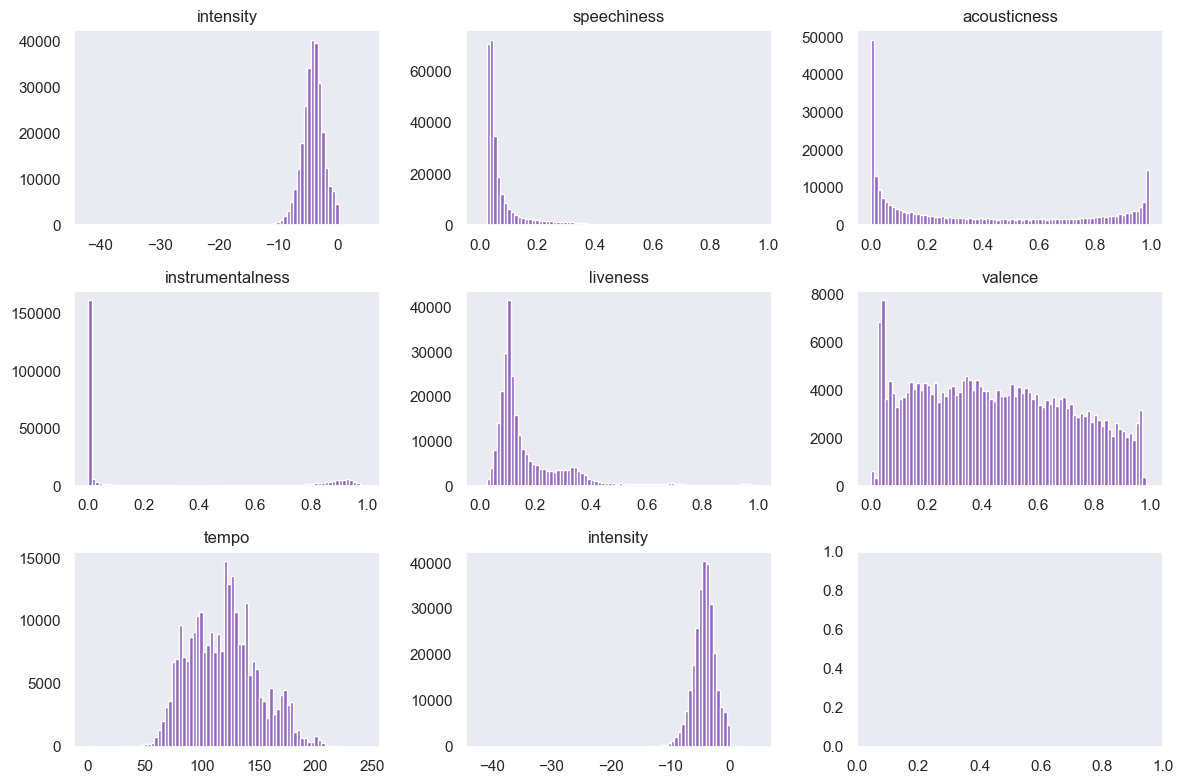

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(12, 8))

columns = ['intensity', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'intensity'] # create a list of columns

for i, col in enumerate(columns): # loop through the columns
    row, col_num = divmod(i, 3) # get the row and column number
    axes[row, col_num].hist(dfx[col], bins=80, color='tab:purple') # Create the histogram
    axes[row, col_num].set_title(col)  # Set the title

plt.tight_layout() # Set the layout

plt.savefig('histograms_grid.jpg') # Save the figure

plt.show() # Show the figure

In [22]:
dfx['instrumentalness'].value_counts() #    get the value counts of the column "instrumentalness"

instrumentalness
0.000000    71748
0.899000      493
0.927000      489
0.925000      481
0.918000      478
            ...  
0.000009        3
0.000099        3
1.000000        2
0.000090        2
0.000009        2
Name: count, Length: 5402, dtype: int64

In [30]:
dfx = dfx.drop('instrumentalness', axis = 1) # drop the column "instrumentalness"

KeyError: "['instrumentalness'] not found in axis"

In [29]:
correlation_matrix = dfx.corr() # get the correlation matrix of the dataframe

In [28]:
dfx.head() # show the first 5 rows of the dataframe

,danceability,intensity,speechiness,acousticness,liveness,valence,tempo
0,0.611,-5.412410,0.0672,0.0169,0.7530,0.520,128.050
1,0.638,-5.348288,0.0285,0.0118,0.3490,0.250,122.985
2,0.560,-6.503490,0.0872,0.0071,0.2410,0.247,170.044
3,0.525,-3.195129,0.0353,0.0178,0.0888,0.199,92.011
4,0.367,-4.520373,0.1060,0.3650,0.0965,0.163,115.917


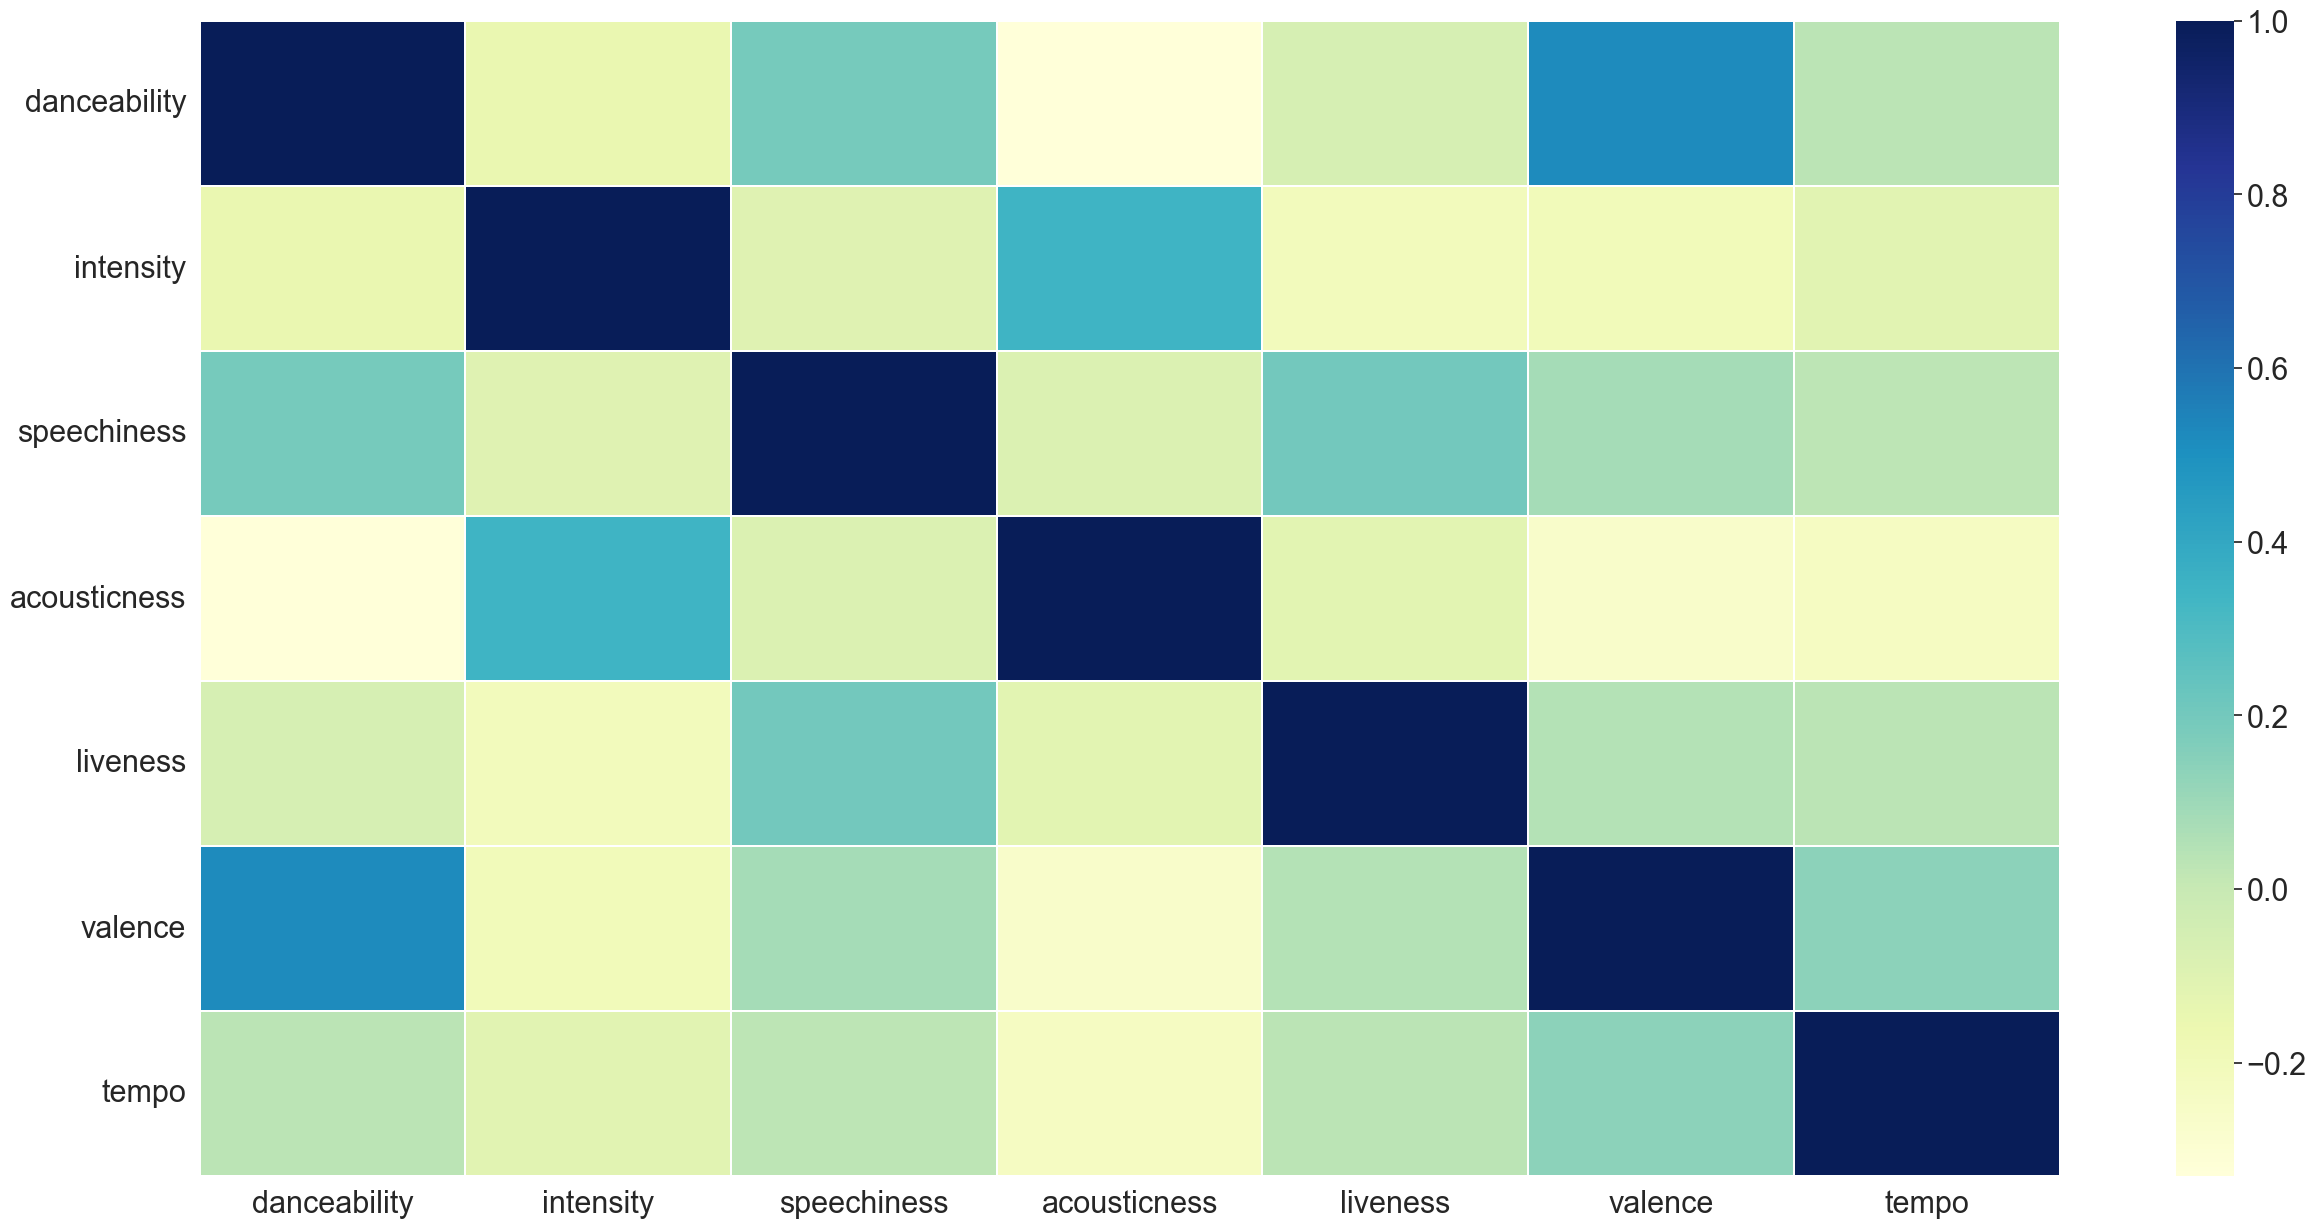

In [31]:
plt.figure(figsize = (30, 15)) # set the figure size
sns.set(font_scale = 2) # set the font scale
heatmap = sns.heatmap(dfx.corr(), annot = False, cmap = 'YlGnBu', linewidths = 0.2, xticklabels=True, yticklabels=True) # create a heatmap of the correlation matrix

In [32]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)) # get the upper triangle of the correlation matrix
all_corr_values = upper_triangle.unstack() # get all the correlation values

In [33]:
highest_positive_corr = all_corr_values[all_corr_values > 0].drop_duplicates().sort_values(ascending=False) # get the highest positive correlation values
lowest_negative_corr = all_corr_values[all_corr_values < 0].drop_duplicates().sort_values(ascending=True) # get the lowest negative correlation values

In [34]:
highest_positive_corr.head(10) # show the first 10 rows of the highest positive correlation values

valence       danceability    0.521399
acousticness  intensity       0.344444
liveness      speechiness     0.200167
speechiness   danceability    0.191194
tempo         valence         0.141085
valence       speechiness     0.080731
              liveness        0.045150
tempo         danceability    0.032550
              liveness        0.031481
              speechiness     0.027930
dtype: float64

In [35]:
lowest_negative_corr.head(10) # show the first 10 rows of the lowest negative correlation values

acousticness  danceability   -0.330091
valence       acousticness   -0.267692
tempo         acousticness   -0.234832
liveness      intensity      -0.208615
valence       intensity      -0.195611
intensity     danceability   -0.148810
liveness      acousticness   -0.117062
tempo         intensity      -0.107220
speechiness   intensity      -0.098398
acousticness  speechiness    -0.083095
dtype: float64

In [36]:
scaler = MinMaxScaler() # create a scaler object

In [37]:
scaled_data = scaler.fit_transform(dfx) # scale the data

In [38]:
from sklearn.neighbors import NearestNeighbors # import the KNN model
from sklearn.metrics import pairwise_distances # import the pairwise distances

In [39]:
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(scaled_data) # create a KNN model

In [40]:
selected_song = df[(df['name'] == 'Life Is Good (feat. Drake)') & (df['artists_names'].apply(lambda x: "Future" in x))] # get the rows that contain the song name "Style" and the artist name "Taylor Swift"

In [41]:
dfx.columns # get the columns of the dataframe

Index(['danceability', 'intensity', 'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [43]:
selected_song_features = selected_song[['danceability', 'intensity', 'speechiness', 'acousticness' , 'liveness', 'valence', 'tempo']].values # get the values of the selected song

In [44]:
scaled_song = scaler.transform(selected_song_features) # scale the selected song

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
distances, indices = model_knn.kneighbors(scaled_song) # get the distances and indices of the scaled song

In [46]:
recommended_songs = df.iloc[indices[0]][['name', 'artists_names']].to_dict(orient = 'records') # get the recommended songs

In [47]:
recommended_songs # show the recommended songs

[{'name': 'Life Is Good (feat. Drake)', 'artists_names': "['Future']"},
 {'name': 'Trippy', 'artists_names': "['Lil Wayne']"},
 {'name': 'Life Is Good (feat. Drake, DaBaby & Lil Baby) - Remix',
  'artists_names': "['Future']"},
 {'name': 'Life Is Good (feat. Drake, DaBaby & Lil Baby) - Remix',
  'artists_names': "['Future', 'DaBaby']"},
 {'name': 'Summerslam', 'artists_names': "['Crunk-n-Buck']"}]

In [48]:
distances # show the distances

array([[0.        , 0.07071971, 0.08867034, 0.0896674 , 0.09128598],
       [0.        , 0.06957033, 0.07277836, 0.09862347, 0.10284413]])

In [ ]:
indices # show the indices

array([[266052, 266413, 232009, 130176, 244143]])

In [ ]:
dfx.columns # get the columns of the dataframe

Index(['danceability', 'intensity', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')